In [48]:
#for data handling
import pandas as pd

#for numerical operations
import numpy as np

In [49]:
# Load HR analytics dataset
df = pd.read_csv(r"C:\Users\Akanksha\Downloads\HR_Analytics.csv")

In [50]:
# Display first 5 records to understand data
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [51]:
# Check number of rows and columns
df.shape

(1480, 38)

In [52]:
# Get column names, data types, and null info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [53]:
# Check percentage distribution of Attrition
df['Attrition'].value_counts(normalize=True) * 100
# Helps understand class imbalance

Attrition
No     83.918919
Yes    16.081081
Name: proportion, dtype: float64

In [54]:
# Check missing values in each column
df.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [55]:
#drop irrelevant columns
# Employee ID does not help prediction
df = df.drop(columns=['EmpID'])
df.head()

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,...,3,80,0,0,2,3,0,0,0,0.0
1,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,...,1,80,0,0,2,3,0,0,0,0.0
2,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,...,4,80,0,0,3,3,0,0,0,0.0
3,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,...,4,80,0,0,2,3,0,0,0,0.0
4,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,...,4,80,0,0,0,3,0,0,0,0.0


In [56]:
# EDA:Exploratory Data Analysis
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

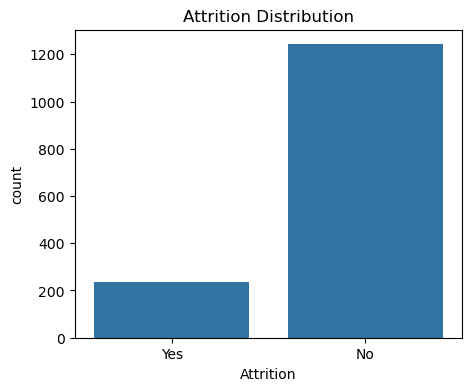

In [57]:
# Plot attrition count
plt.figure(figsize=(5,4))
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()
# Shows how many employees left vs stayed

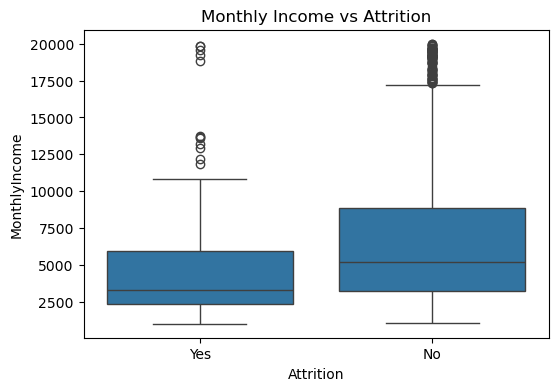

In [58]:
# Compare income distribution for attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()
# Helps check if low salary leads to attrition

In [59]:
# Encode Target Variable
# Convert Attrition into numeric form
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Attrition'].value_counts()

Attrition
0    1242
1     238
Name: count, dtype: int64

In [60]:
# Encode Categorical Columns
# Import label encoder
from sklearn.preprocessing import LabelEncoder

In [61]:
# Initialize encoder
le = LabelEncoder()

# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Encode each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()
    
# Converts text data into machine-readable number

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,0,1,3,230,1,3,3,1,1,...,3,80,0,0,2,3,0,0,0,0.0
1,18,0,0,3,812,2,10,3,3,1,...,1,80,0,0,2,3,0,0,0,0.0
2,18,0,1,2,1306,2,5,3,2,1,...,4,80,0,0,3,3,0,0,0,0.0
3,18,0,0,0,287,1,5,2,1,1,...,4,80,0,0,2,3,0,0,0,0.0
4,18,0,1,0,247,1,8,1,3,1,...,4,80,0,0,0,3,0,0,0,0.0


In [26]:
df.head()

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,0,1,3,230,1,3,3,1,1,...,3,80,0,0,2,3,0,0,0,0.0
1,18,0,0,3,812,2,10,3,3,1,...,1,80,0,0,2,3,0,0,0,0.0
2,18,0,1,2,1306,2,5,3,2,1,...,4,80,0,0,3,3,0,0,0,0.0
3,18,0,0,0,287,1,5,2,1,1,...,4,80,0,0,2,3,0,0,0,0.0
4,18,0,1,0,247,1,8,1,3,1,...,4,80,0,0,0,3,0,0,0,0.0


In [62]:
# Create new meaningful features
df['TenureRatio'] = df['YearsAtCompany'] / (df['TotalWorkingYears'] + 1)
df['PromotionGap'] = df['YearsAtCompany'] - df['YearsSinceLastPromotion']
df['IncomePerExperience'] = df['MonthlyIncome'] / (df['TotalWorkingYears'] + 1)

# Display newly created features
df[['TenureRatio', 'PromotionGap', 'IncomePerExperience']].head()

,TenureRatio,PromotionGap,IncomePerExperience
0,0.0,0,1420.0
1,0.0,0,1200.0
2,0.0,0,1878.0
3,0.0,0,1051.0
4,0.0,0,1904.0


In [63]:
# Handle Infinite & Missing Values (CRITICAL)
# Replace infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Final verification
df.isnull().sum().sum()

0

In [64]:
# Feature Matrix & Target Preview
# Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Display shapes
X.shape, y.shape

((1480, 39), (1480,))

In [65]:
# Train-Test Split (Verify Split)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((1110, 39), (370, 39))

In [66]:
# Missing Value Handling (Industry Standard)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

np.isnan(X_train_imputed).sum()

0

In [68]:
# Feature Scaling (Check Scaled Values)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled, columns=X.columns).head()


,Age,AgeGroup,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureRatio,PromotionGap,IncomePerExperience
0,0.035069,0.419716,0.541882,-1.227661,1.368988,0.081380,1.058205,-0.928559,0.0,0.102310,...,-0.420629,1.710110,0.321279,-0.985234,-1.164923,-0.681083,-1.180653,-1.674452,-0.790178,0.576028
1,-1.423273,-1.752241,-0.522700,-0.595348,-0.511676,-0.895183,-1.873428,2.080785,0.0,0.991126,...,-0.679442,-0.617093,0.321279,-0.167276,-0.347218,-0.371500,-0.313521,0.957728,0.036688,-0.145382
2,0.932510,0.419716,0.541882,-1.553621,-2.392341,-0.651042,0.080994,-0.928559,0.0,1.152131,...,-0.291223,-0.617093,1.753484,-0.330868,-1.164923,-0.681083,-0.313521,-0.302358,0.036688,1.385373
3,-0.301472,-0.666262,0.541882,-1.575679,-0.511676,-0.162761,2.035416,-0.928559,0.0,-0.439850,...,-0.550036,0.158641,0.321279,-1.148825,-1.164923,-0.681083,-1.180653,-2.066479,-0.996895,0.214152
4,-1.198913,-0.666262,0.541882,0.269794,-2.392341,1.302085,-0.896217,0.576113,0.0,1.273707,...,-0.679442,0.158641,0.321279,-0.330868,-0.892354,-0.371500,-0.024478,0.453693,-0.170029,-0.949363


In [69]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

lr


LogisticRegression(max_iter=1000)

In [70]:
# Baseline Model Evaluation
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_pred_lr = lr.predict(X_test_scaled)

confusion_matrix(y_test, y_pred_lr)

print(classification_report(y_test, y_pred_lr))

roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1])

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       311
           1       0.79      0.37      0.51        59

    accuracy                           0.88       370
   macro avg       0.84      0.68      0.72       370
weighted avg       0.87      0.88      0.87       370



0.8584664014387706

In [71]:
# Handle Class Imbalance (SMOTE)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

pd.Series(y_train_sm).value_counts()

Attrition
0    931
1    931
Name: count, dtype: int64

In [72]:
# Optimized Model (Random Forest)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

rf.fit(X_train_sm, y_train_sm)
rf

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [73]:
# Optimized Model Evaluation
y_pred_rf = rf.predict(X_test_scaled)

confusion_matrix(y_test, y_pred_rf)

print(classification_report(y_test, y_pred_rf))

roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1])

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       311
           1       0.57      0.36      0.44        59

    accuracy                           0.85       370
   macro avg       0.73      0.65      0.68       370
weighted avg       0.84      0.85      0.84       370



0.8496920813123331

In [74]:
# Feature Importance (Insight Engine)
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

OverTime                0.117143
StockOptionLevel        0.079135
JobLevel                0.053163
JobSatisfaction         0.051551
MaritalStatus           0.042545
YearsWithCurrManager    0.041953
MonthlyIncome           0.033327
YearsAtCompany          0.032395
AgeGroup                0.029725
PromotionGap            0.027973
dtype: float64

In [75]:
# Root Cause Analysis
results = X_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = y_pred_rf

false_negatives = results[(results['Actual'] == 1) & (results['Predicted'] == 0)]
false_negatives.head()

,Age,AgeGroup,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureRatio,PromotionGap,IncomePerExperience,Actual,Predicted
719,35,1,3,763,2,15,2,3,1,1645,...,2,2,2,2,2.0,0.250000,0,680.000000,1,0
1118,43,2,3,1372,2,9,3,2,1,1188,...,2,4,3,1,3.0,0.500000,3,668.250000,1,0
1013,41,2,3,1102,2,1,2,1,1,1,...,1,6,4,0,5.0,0.666667,6,665.888889,1,0
306,29,1,3,224,1,1,4,5,1,1522,...,1,9,7,0,7.0,0.750000,9,196.833333,1,0
1293,49,3,2,1475,1,28,2,1,1,1420,...,3,4,3,1,3.0,0.190476,3,204.000000,1,0


In [76]:
# Unstructured Data (Employee Feedback)
df_text = pd.DataFrame({
    'feedback': [
        "I feel overworked and stressed",
        "No growth opportunities",
        "Good team but poor work life balance",
        "Satisfied with role and manager",
        "Low salary and high pressure"
    ],
    'Attrition': [1, 1, 1, 0, 1]
})

df_text

,feedback,Attrition
0,I feel overworked and stressed,1
1,No growth opportunities,1
2,Good team but poor work life balance,1
3,Satisfied with role and manager,0
4,Low salary and high pressure,1


In [77]:
# TF-IDF Processing
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
X_text = tfidf.fit_transform(df_text['feedback'])

pd.DataFrame(
    X_text.toarray(),
    columns=tfidf.get_feature_names_out()
)

,balance,feel,good,growth,high,life,low,manager,opportunities,overworked,poor,pressure,role,salary,satisfied,stressed,team,work
0,0.000000,0.57735,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.57735,0.000000,0.0,0.00000,0.0,0.00000,0.57735,0.000000,0.000000
1,0.000000,0.00000,0.000000,0.707107,0.0,0.000000,0.0,0.00000,0.707107,0.00000,0.000000,0.0,0.00000,0.0,0.00000,0.00000,0.000000,0.000000
2,0.408248,0.00000,0.408248,0.000000,0.0,0.408248,0.0,0.00000,0.000000,0.00000,0.408248,0.0,0.00000,0.0,0.00000,0.00000,0.408248,0.408248
3,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.57735,0.000000,0.00000,0.000000,0.0,0.57735,0.0,0.57735,0.00000,0.000000,0.000000
4,0.000000,0.00000,0.000000,0.000000,0.5,0.000000,0.5,0.00000,0.000000,0.00000,0.000000,0.5,0.00000,0.5,0.00000,0.00000,0.000000,0.000000


In [78]:
# Text-Based Attrition Model
text_model = LogisticRegression()
text_model.fit(X_text, df_text['Attrition'])

text_model

LogisticRegression()

In [79]:
# Deployment Architecture (Markdown)
# Structured HR data and unstructured employee feedback are processed
# through separate pipelines.

# The trained model is deployed as a REST API and integrated
# with an HR dashboard to generate attrition risk alerts.

# Final Business Insights (Markdown)
# • Employees with low salary growth, long promotion gaps, and high workload
#   show higher attrition risk.

# • Combining structured HR data with employee feedback
#   enables proactive retention strategies.